### Import libraries

In [100]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
# Warnings
import warnings
warnings.filterwarnings('ignore')
#model
import texthero as hero
from sklearn.model_selection import train_test_split   
import sklearn.metrics as mt
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score as AUC

### Text preprocessing

In [101]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)
df.index = range(df.shape[0])    #Recovery index
df=df[df['Review Text'].notnull()]   #dorp null in review text
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              22641 non-null  int64 
 1   Age                      22641 non-null  int64 
 2   Title                    19675 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   22641 non-null  int64 
 5   Recommended IND          22641 non-null  int64 
 6   Positive Feedback Count  22641 non-null  int64 
 7   Division Name            22628 non-null  object
 8   Department Name          22628 non-null  object
 9   Class Name               22628 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [102]:
# new dafaframe with labels( rating>=3:positive, rating<3:negative)
df["Word Count"] = df['Review Text'].str.split().apply(len)
# Character Length
df["Character Count"] = df['Review Text'].apply(len)
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1
data=df[['Review Text','Label',
         'Word Count','Character Count']]
data.head()

,Review Text,Label,Word Count,Character Count
0,Absolutely wonderful - silky and sexy and comf...,1,8,53
1,Love this dress! it's sooo pretty. i happene...,1,62,303
2,I had such high hopes for this dress and reall...,1,98,500
3,"I love, love, love this jumpsuit. it's fun, fl...",1,22,124
4,This shirt is very flattering to all due to th...,1,36,192


In [103]:
train_data,test_data = train_test_split(data,train_size=0.8,random_state=0) # split traing and testing data

In [104]:
#text cleaning
#defalut pipeline:fillna()lowercase()remove_digits()remove_punctuation()remove_diacritics()remove_stopwords()remove_whitespace()

XTrain=hero.clean(train_data['Review Text']) 
XTest=hero.clean(test_data['Review Text'])

In [105]:
#futher clean by stemming
XTrain = hero.stem(XTrain)
XTest=hero.stem(XTest)
XTrain.index = range(XTrain.shape[0])# recover index
XTest.index = range(XTest.shape[0])

In [106]:
XTrain.str.split().apply(len).sum()   

512018

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer() 
X_train = vect.fit_transform(XTrain)
X_test=vect.transform(XTest)

y_train=train_data['Label']
y_test=test_data['Label']

###  Building a Sentiment Classifier
- 1.Logistic Regression
- 2.Naive Bayes
- 3.Support Vector Machine (SVM)
- 4.Ensemble learning
- 5.Deep learning

#### 1.Logistic Regression
Logical regression is a classification algorithm, through the method of maximizing the likelihood function, the use of gradient descent or other algorithm to solve the parameters which can minimizes the loss function.
That is to say, we convert the input value into the predicted value in linear regression, and then map it to the Sigmoid function. The value is taken as a variable on the X axis, and the Y axis as a probability. The closer the Y value corresponding to the predicted value is to 1, the more it conforms to the predicted result. But the better the fit, does not mean the better the result, may be over fitting.

In [9]:
%time
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(solver='lbfgs',penalty='l2',random_state=0)
clf=lr.fit(X_train,y_train)
pred_senti = clf.predict(X_test)

LR_acc_score = accuracy_score(pred_senti,y_test)
print("Classification Accuracy is {}".format(LR_acc_score))

print("Logistic Regression")
print(mt.classification_report(y_test, pred_senti))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 8.82 µs
Classification Accuracy is 0.9096930889821152
Logistic Regression
              precision    recall  f1-score   support

           0       0.72      0.27      0.39       489
           1       0.92      0.99      0.95      4040

    accuracy                           0.91      4529
   macro avg       0.82      0.63      0.67      4529
weighted avg       0.90      0.91      0.89      4529



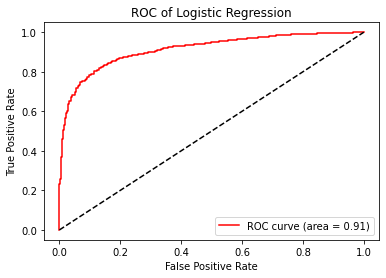

In [10]:
from sklearn.metrics import roc_curve
FPR, TPR, thresholds = roc_curve(y_test,clf.decision_function(X_test))
from sklearn.metrics import roc_auc_score as AUC
area = AUC(y_test,clf.decision_function(X_test))
plt.figure()
plt.plot(FPR, TPR, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Logistic Regression')
plt.legend(loc="lower right")
plt.show()

#### 2.Naive Bayes
Naive Bayes is a classification method based on Bayes' theorem and the assumption of independence of characteristic conditions. For a given data set, the joint probability distribution of input/output is first learned based on the assumption of characteristic condition independence. Then, based on this model, for a given input x, the output y with the maximum posterior probability can be obtained by using Bayes' theorem.

In [11]:
%time
from sklearn.naive_bayes import BernoulliNB
nb= BernoulliNB()
clf=nb.fit(X_train,y_train)
pred_senti = clf.predict(X_test)

NB_acc_score = accuracy_score(pred_senti, y_test)
print("Classification Accuracy is {}".format(NB_acc_score))

print(" Naive Bayes")
print(mt.classification_report(y_test, pred_senti))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.77 µs
Classification Accuracy is 0.9013027158313094
 Naive Bayes
              precision    recall  f1-score   support

           0       0.56      0.41      0.47       489
           1       0.93      0.96      0.95      4040

    accuracy                           0.90      4529
   macro avg       0.74      0.68      0.71      4529
weighted avg       0.89      0.90      0.89      4529



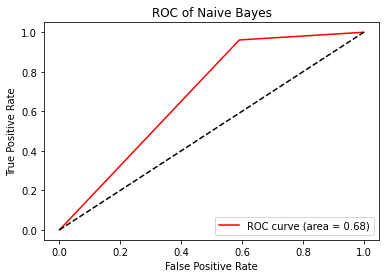

In [12]:
FPR, TPR, thresholds = roc_curve(y_test,clf.predict(X_test))
area = AUC(y_test,clf.predict(X_test))
plt.figure()
plt.plot(FPR, TPR, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Naive Bayes')
plt.legend(loc="lower right")
plt.show()

#### 3.Support Vector Machine (SVM)
Support vector machine (SVM) is a binary classification model. Its basic model is to find a linear classifier with the maximized separation hyperplane in the feature space. The learning strategy is interval maximization, which can be formalized as an optimization problem for convex quadratic programming, which is equivalent to the minimization problem of the regularized hinge loss function.

In [13]:
%time
from sklearn.svm import SVC
svm = SVC(kernel='linear') 

clf=svm.fit(X_train,y_train)
pred_senti = clf.predict(X_test)

SVM_acc_score = accuracy_score(pred_senti,y_test)
print("Classification Accuracy is {}".format(SVM_acc_score))

print("SVM")
print(mt.classification_report(y_test, pred_senti))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs
Classification Accuracy is 0.910355486862442
SVM
              precision    recall  f1-score   support

           0       0.69      0.31      0.43       489
           1       0.92      0.98      0.95      4040

    accuracy                           0.91      4529
   macro avg       0.80      0.65      0.69      4529
weighted avg       0.90      0.91      0.90      4529



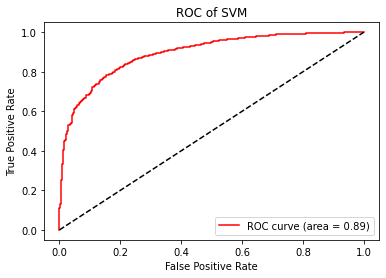

In [14]:
FPR, TPR, thresholds = roc_curve(y_test,clf.decision_function(X_test))
area = AUC(y_test,clf.decision_function(X_test))
plt.figure()
plt.plot(FPR, TPR, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of SVM')
plt.legend(loc="lower right")
plt.show()

#### 4.Ensemble learning-bagging（Random Forest）
In fact, random forest is a special bagging method, which takes decision tree as the base learning machine. Based on the construction of bagging integration, random feature selection is further introduced into the training process of decision tree. Therefore, it can be divided into four parts: randomly selected sample (autonomous sampling method), random feature selection, decision tree construction, and random forest voting (average). 

Firstly, M training sets are generated with Bootstrap method, and then, a decision tree is constructed for each training set. When the node looks for features to split, it is not to find all features that can maximize the index (such as information gain), but to randomly extract some features from the features, and find the optimal solution among the extracted features and apply it to the node for splitting.

In [15]:
%time
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_features="auto",random_state=0)

clf=rf.fit(X_train,y_train)
pred_senti = clf.predict(X_test)

RF_acc_score = accuracy_score(pred_senti,y_test)
print("Classification Accuracy is {}".format(RF_acc_score))

print("Random Forest")
print(mt.classification_report(y_test, pred_senti))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 24.8 µs
Classification Accuracy is 0.8984323250165599
Random Forest
              precision    recall  f1-score   support

           0       0.63      0.14      0.23       489
           1       0.90      0.99      0.95      4040

    accuracy                           0.90      4529
   macro avg       0.77      0.57      0.59      4529
weighted avg       0.88      0.90      0.87      4529



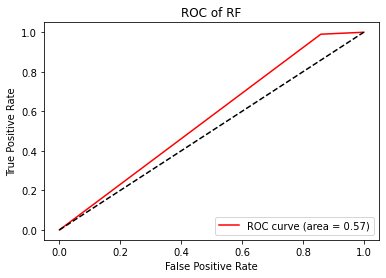

In [16]:
FPR, TPR, thresholds = roc_curve(y_test,clf.predict(X_test))
area = AUC(y_test,clf.predict(X_test))

plt.plot(FPR, TPR, color='red',
         label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of RF')
plt.legend(loc="lower right")
plt.show()

#### 5.Deep learning(keras embedding)

In [96]:
from tensorflow import keras
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Activation, Dropout, LSTM
from keras.optimizers import Adam

In [109]:
#word2vec
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(XTrain)

X_train = tokenizer.texts_to_sequences(XTrain)
X_test = tokenizer.texts_to_sequences(XTest)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])

#padding
maxlen = 30
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[77, 514, 64, 22, 1, 286, 141, 90, 2]
[  80   28 1502   19   95 1531  177  291  324  211   38 1029  214    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [110]:
#pre-traning
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath,encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
embedding_dim =64
embedding_matrix = create_embedding_matrix('/Users/grace.gu/Desktop/pythonfile/text-feature/data/glove.6B.100d.txt'
                                           ,tokenizer.word_index, embedding_dim)

In [111]:
#bulid CNN+LSTM model
from keras.layers import Conv1D,MaxPooling1D
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           #weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(Conv1D(64,3,activation='relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling1D(4))
model.add(Dropout(0.4))
model.add((LSTM(32,return_sequences=False)))
#model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_40 (Embedding)     (None, 30, 64)            555456    
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 28, 64)            12352     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 7, 64)             0         
_________________________________________________________________
dropout_61 (Dropout)         (None, 7, 64)             0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 32)                12416     
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 33        
Total params: 580,257
Trainable params: 580,257
Non-trainable params: 0
_______________________________________________

In [60]:
#plot accuracy and loss
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_history(history,name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

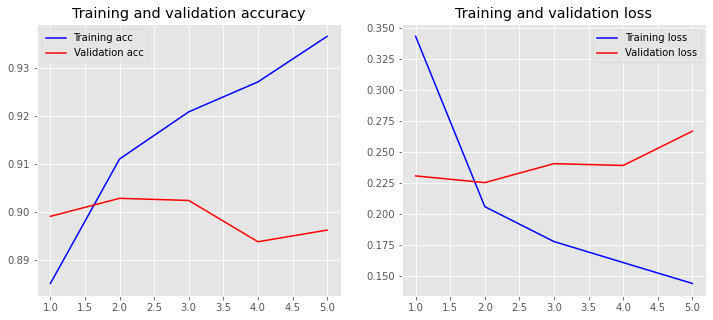

In [22]:
plot_history(history,name='LSTMCNN without pre-trained')

In [23]:
#bulid CNN+LSTM model
from keras.layers import Conv1D,MaxPooling1D
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(Conv1D(64,3,activation='relu'))
#model.add(Dropout(0.5))
model.add(MaxPooling1D(4))
model.add(Dropout(0.4))
model.add((LSTM(32,return_sequences=False)))
#model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train,
                    epochs=5,
                    validation_data=(X_test, y_test),
                    batch_size=64)
loss, accuracy = model.evaluate(X_train, y_train)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 30, 64)            555456    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            12352     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 64)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 580,257
Trainable params: 580,257
Non-trainable params: 0
________________________________________________

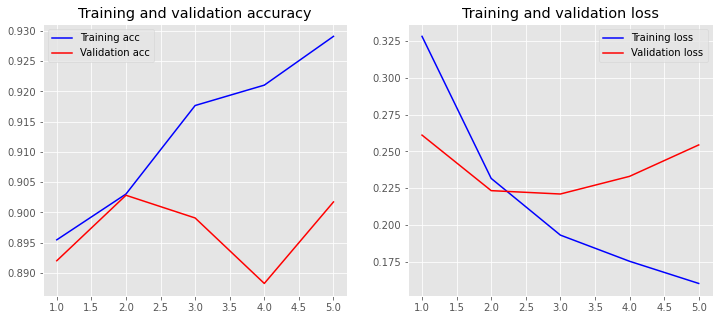

In [24]:
plot_history(history,name='LSTMCNN with pre-trained')

#### Multi-Classification
label[0,1,2,3,4]=Rating[1,2,3,4,5]

In [43]:
data2=df[['Review Text','Rating']]
data2.head()

,Review Text,Rating
0,Absolutely wonderful - silky and sexy and comf...,4
1,Love this dress! it's sooo pretty. i happene...,5
2,I had such high hopes for this dress and reall...,3
3,"I love, love, love this jumpsuit. it's fun, fl...",5
4,This shirt is very flattering to all due to th...,5


In [44]:
train_data,test_data = train_test_split(data2,train_size=0.8,random_state=0) # split traing and testing data

In [49]:
XTrain=hero.clean(train_data['Review Text']) 
XTest=hero.clean(test_data['Review Text'])
XTrain=hero.stem(XTrain)
XTest=hero.stem(XTest)

y_train=train_data['Rating']
y_test=test_data['Rating']
y_train=y_train-1   #index from 0
y_test=y_test-1

In [50]:
from keras.utils import to_categorical   #one-hot encoding
y_train1 = to_categorical(y_train,num_classes=5)
y_test1= to_categorical(y_test,num_classes=5)
print(y_train1.shape)
print(y_test1.shape)

(18112, 5)
(4529, 5)


In [54]:
#word2vec
tokenizer = Tokenizer()
tokenizer.fit_on_texts(XTrain)

X_train = tokenizer.texts_to_sequences(XTrain)
X_test = tokenizer.texts_to_sequences(XTest)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(X_train[2])

#padding
maxlen = 30
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print(X_train[0, :])

[77, 514, 64, 22, 1, 286, 141, 90, 2]
[  80   28 1502   19   95 1531  177  291  324  211   38 1029  214    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [92]:
#pre-traning
def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath,encoding='utf-8') as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix
embedding_dim =64
embedding_matrix = create_embedding_matrix('/Users/grace.gu/Desktop/pythonfile/text-feature/data/glove.6B.100d.txt'
                                           ,tokenizer.word_index, embedding_dim)

In [93]:
from keras.layers import Conv1D,GlobalMaxPooling1D
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix],
                           input_length=maxlen, 
                           trainable=False))
model.add(Conv1D(100,3,activation='relu'))
#model.add(Conv1D(50,3,activation='relu'))
model.add(Dropout(0.5))
#model.add(MaxPooling1D(4))
model.add(GlobalMaxPooling1D())
#model.add((LSTM(32,return_sequences=False)))
model.add(Dense(40, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))

#model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001)
model.compile(optimizer=opt,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
history = model.fit(X_train, y_train1,
                    epochs=30,
                    validation_data=(X_test, y_test1),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 30, 64)            555456    
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 28, 100)           19300     
_________________________________________________________________
dropout_53 (Dropout)         (None, 28, 100)           0         
_________________________________________________________________
global_max_pooling1d_18 (Glo (None, 100)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 40)                4040      
_________________________________________________________________
dropout_54 (Dropout)         (None, 40)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 5)               

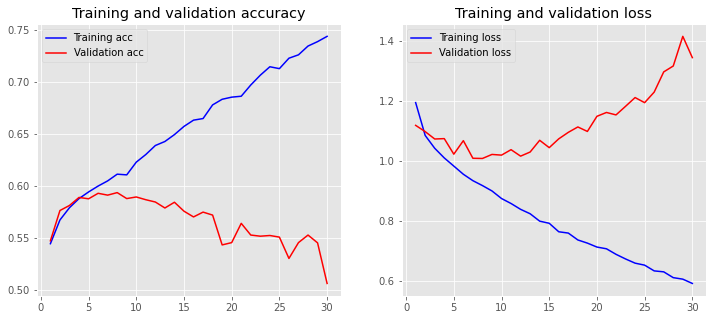

In [91]:
plot_history(history,name='multi-class classification')

try transformer

In [76]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [77]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [94]:
import tensorflow as tf
embed_dim = 64  # Embedding size for each token
num_heads = 5  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(40, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(5, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [95]:
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, y_train1, batch_size=64, epochs=10, validation_data=(X_test, y_test1)
)
loss, accuracy = model.evaluate(X_train, y_train1)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test1)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/10
283/283 [==============================] - 24s 81ms/step - loss: 1.1856 - accuracy: 0.5503 - val_loss: 0.9299 - val_accuracy: 0.6107
Epoch 2/10
283/283 [==============================] - 21s 73ms/step - loss: 0.8842 - accuracy: 0.6302 - val_loss: 0.9019 - val_accuracy: 0.6231
Epoch 3/10
283/283 [==============================] - 22s 76ms/step - loss: 0.7981 - accuracy: 0.6682 - val_loss: 0.9207 - val_accuracy: 0.6076
Epoch 4/10
283/283 [==============================] - 20s 70ms/step - loss: 0.7235 - accuracy: 0.7058 - val_loss: 0.9883 - val_accuracy: 0.6163
Epoch 5/10
283/283 [==============================] - 20s 72ms/step - loss: 0.6626 - accuracy: 0.7340 - val_loss: 1.0730 - val_accuracy: 0.6050
Epoch 6/10
283/283 [==============================] - 21s 74ms/step - loss: 0.5962 - accuracy: 0.7676 - val_loss: 1.0933 - val_accuracy: 0.5986
Epoch 7/10
283/283 [==============================] - 21s 74ms/step - loss: 0.5118 - accuracy: 0.8035 - val_loss: 1.2555 - val_accuracy: